<a href="https://colab.research.google.com/github/csbg08/BootcampAI/blob/main/Clasif_Img_Convol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Primero importamos Numpy y ajustamos la semilla del generador aleatorio, para tener reproducibilidad en el entrenamiento, 
#es decir para que los coeficientes de los filtros y de la Red Neuronal se inicialicen siempre en el mismo valor aleatorio.

import numpy as np
np.random.seed(2)

import matplotlib.pyplot as plt


In [ ]:
# mnist para cargar el set de datos de forma sencilla.
#También importamos np_utils, que permite representar cada etiqueta de las imágenes en el formato one-hot, requerido por Keras durante 
#el entrenamiento y la validación de la Red Convolucional:

from keras.datasets import mnist
from keras.utils import np_utils

In [ ]:
#Ahora, importamos las librerías Sequential (para crear el contenedor del modelo), Conv2D y Maxpooling2D (para implementar las capas convolucionales), 
#Flatten y Dense (para la Red Neuronal) así como SGD (para usar el método del Gradiente Descendente durante el entrenamiento):

from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

In [ ]:
#***Lectura y pre-procesamiento de los datos***
#La lectura de los sets de entrenamiento y validación se realiza de forma sencilla usando la función mnist importada anteriormente:

(x_train, y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
#Una vez leídos los datos, y antes de crear la Red Convolucional, es necesario reajustarlos para garantizar que el entrenamiento sea 
#adecuado y para que los mismos tengan el formato requerido por Keras.

#Primero normalizamos cada imagen, para que cada pixel esté en el rango de 0 a 1 (y no de 0 a 255). Esto es necesario para garantizar la 
#convergencia del algoritmo del Gradiente Descendente durante el entrenamiento:

x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
#A continuación convertimos las etiquetas de los sets de entrenamiento y validación al formato one-hot, usando la función np_utils. 
#En este formato, cada categoría estará representada con una secuencia de números binarios: por ejemplo los dígitos que pertenezcan a 
#la categoría 4 serán representados por la secuencia  (de ahí el nombre one-hot: sólo uno de los dígitos será diferente de cero):

nclases = 10
y_train = np_utils.to_categorical(y_train,nclases)
y_test = np_utils.to_categorical(y_test,nclases)

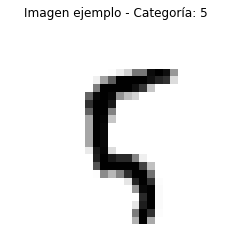

In [ ]:
#Veamos cómo es una de las imágenes del set de entrenamiento. Para ello escogemos una imagen del set y, con Matplotlib, visualizamos 
#la imagen y la categoría correspondiente:

nimagen = 100
plt.imshow(x_train[nimagen,:].reshape(28,28), cmap='gray_r')
plt.title('Imagen ejemplo - Categoría: ' + str(np.argmax(y_train[nimagen])))
plt.axis('off')
plt.show()


In [ ]:
#Finalmente, debemos reajustar las imágenes de entrenamiento y validación, para indicar explícitamente a Keras que cada imagen tendrá un 
#solo canal de información (por tratarse de imágenes en escala de gris). Para esto usamos la función reshape de Numpy:

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
#Creación del modelo en Keras
#Bien, ya tenemos todo listo para implementar el modelo usando Keras.

#El primer paso es usar Sequential para crear el contenedor del modelo, en donde progresivamente se irán añadiendo las diferentes capas de la Red Convolucional:

modelo = Sequential()

In [ ]:
#Ahora añadimos la primera capa convolucional, con 6 filtros, cada uno de 5x5, sin padding y con stride igual a 1 y función de 
#activación ReLU. Debemos igualmente definir de forma explícita el tamaño de cada imagen de entrada (28x28x1):

# CONV1 Y MAX-POOLING1
modelo.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))

In [ ]:
#Vemos que el uso de Conv2D no requiere en este caso que definamos el padding ni los strides de forma explícita. Por defecto, 
#Keras usará un padding igual a 0 y un stride igual a 1.

#Ahora, añadimos la primera capa max-pooling. En este caso se usan 6 filtros (los mismos de la capa anterior) y no se usa padding. 
#De nuevo, en Keras basta con definir únicamente el tamaño de cada filtro usando la palabra clave pool_size, los demás parámetros 
#(padding = 0 y strides = 2 no se deben introducir explícitamente en la función):

modelo.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#La segunda capa convolucional y la segunda de max-pooling se crean de la misma forma que las anteriores, con la única diferencia 
#que en este caso el número de filtros es igual a 16:

# CONV2 Y MAX-POOLING2
modelo.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#Finalmente, aplanamos el volumen resultante usando Flatten() y creamos la Red Neuronal con 120 neuronas en la primera capa, 
#84 en la segunda y una salida tipo softmax con 10 categorías.:

# Aplanar, FC1, FC2 y salida
modelo.add(Flatten())
modelo.add(Dense(120,activation='relu'))
modelo.add(Dense(84,activation='relu'))
modelo.add(Dense(nclases,activation='softmax'))

In [ ]:
#***Compilación del modelo***
#En este paso definimos el optimizador, es decir el método que se usará para actualizar los coeficientes de los filtros y de la Red Neuronal 
#durante el entrenamiento.

#En nuestro caso usaremos el método del Gradiente Descendente, y fijaremos una tasa de aprendizaje de 0.1:

sgd = SGD(lr=0.1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#Ahora asociamos este optimizador al modelo creado previamente, y además definimos nuestra función de error y la métrica con la 
#que evaluaremos el desempeño de la red convolucional. Para esto hacemos uso de la función compile.

#Por tener un total de 10 categorías de salida, haremos uso de la “entropía cruzada” (categorical_crossentropy) como función de error, 
#mientras que el desempeño de la red será evaluado usando la “precisión” (accuracy) definida como número de aciertos sobre el número total 
#de datos en los sets de entrenamiento y validación:

modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
#***Entrenamiento y validación del modelo***
#Ahora sí está todo listo para hacer el entrenamiento.

#Usaremos un total de 10 iteraciones y, por ser un set de 60,000, en cada iteración del entrenamiento lo dividiremos en bloques de 128 imágenes 
#(para no tener problemas con el almacenamiento de los datos en memoria).

#Para el entrenamiento usamos la función fit y podemos usar la palabra clave validation_data para que durante el mismo entrenamiento Keras 
#evalúe la precisión que se logra con el set de validación. De todos modos es importante tener en cuenta que este set de validación se usa 
#sólo para medir el desempeño del modelo, pero no para entrenarlo ni para aprender los coeficientes (para ello se usa el set de entrenamiento):

nepochs = 10
tam_lote = 128
modelo.fit(x_train,y_train,epochs=nepochs,batch_size=tam_lote, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 24s 50ms/step - loss: 1.9991 - accuracy: 0.2489 - val_loss: 1.1801 - val_accuracy: 0.4937
Epoch 2/10
469/469 [==============================] - 22s 48ms/step - loss: 0.7654 - accuracy: 0.7426 - val_loss: 0.4230 - val_accuracy: 0.9109
Epoch 3/10
469/469 [==============================] - 23s 49ms/step - loss: 0.2489 - accuracy: 0.9461 - val_loss: 0.1582 - val_accuracy: 0.9661
Epoch 4/10
469/469 [==============================] - 23s 50ms/step - loss: 0.1501 - accuracy: 0.9662 - val_loss: 0.1141 - val_accuracy: 0.9730
Epoch 5/10
469/469 [==============================] - 22s 48ms/step - loss: 0.1017 - accuracy: 0.9763 - val_loss: 0.1226 - val_accuracy: 0.9769
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0792 - accuracy: 0.9812 - val_loss: 0.0875 - val_accuracy: 0.9792
Epoch 7/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0657 - accuracy: 0.9844 - val_loss: 0.0892 - val_accuracy:

In [ ]:
# Vemos que al finalizar el entrenamiento se alcanza una precisión de más del 99% con el set de entrenamiento, y superior al 98% con el set de validación:

#Bien, acabamos de ver que el modelo entrenado tiene un desempeño bastante bueno, pues la precisión con el set de validación 
#(es decir, con datos que no ha visto previamente) es prácticamente del 99%. Lo anterior quiere decir que de cada 100 datos, 
#en promedio el modelo clasifica incorrectamente tan sólo 1. ¡Lo cual no está nada mal para esta Red Convolucional!

#Para finalizar, veamos cómo analizar el desempeño del modelo de forma más detallada usando algo que se conoce como la matriz de confusión.

